Titanic

Projenin amacı titanic kazasında insanların hayatta kalıp kalmadığını bulmamız gerekiyor 

In [1]:
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('ttrain.csv')

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df2=pd.read_csv('ttest.csv')

In [5]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df=pd.concat([df1,df2])
#iki dosyayı birleştiriyoruz ki her birine yarı ayrı manupilasyon uygulamak zorunda kalmayalm 

In [7]:
df.shape

(1309, 12)

In [8]:
df.isnull().sum()
#boş verileri kontrol ediytoruz

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df['Fare'].mean(),df['Fare'].max(),df['Fare'].min(),df['Fare'].std(),

(33.29547928134557, 512.3292, 0.0, 51.75866823917414)

In [10]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
#hangisinden en fazla var şeklinde için felan kullanıyoruz

In [11]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
#boş olan veriyi ortalama ile doldurdum 

In [12]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Embarked'>

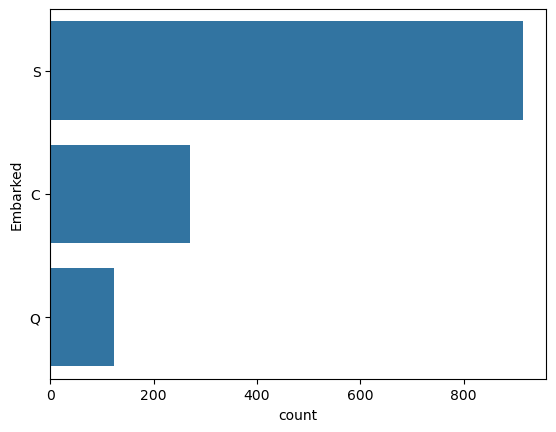

In [13]:
sns.countplot(df['Embarked'])

In [14]:
df["Embarked"] = df["Embarked"].fillna('S')

In [15]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [16]:
df['Cabin'].value_counts()
#çok fazla boş veri var doldurmak hata ya sebep olur ondan silmek en mantıklısı

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [17]:
del df['Cabin']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [19]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')
#harici bir sınıftan yardım alarak dolduruyorum yaş kısmını hitabetlere göre bakmak daha mantıklı geldi

In [20]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [21]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Capt','Jonkheer'],'Mr')

In [22]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [23]:
del df['Name'] #artık işimiz kalmadı isimlerle title yeterli

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [25]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))
#her grubunun yaşlarını kendi aralarında ortalamalarını aldım 

In [26]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [27]:
df.corr(numeric_only=True)
#neler ne kadar etki ediyor onu kontrol ettim 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.024425,-0.055224,0.008942,0.031416
Survived,-0.005007,1.000000,-0.338481,-0.075808,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.386723,0.060832,0.018322,-0.558477
Age,0.024425,-0.075808,-0.386723,1.000000,-0.216262,-0.132567,0.177429
SibSp,-0.055224,-0.035322,0.060832,-0.216262,1.000000,0.373587,0.160224
Parch,0.008942,0.081629,0.018322,-0.132567,0.373587,1.000000,0.221522
Fare,0.031416,0.257307,-0.558477,0.177429,0.160224,0.221522,1.000000


In [28]:
del df['PassengerId']
del df['Ticket']
#gereksizleri sildik 

In [29]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,30.0,0,0,8.0500,S,Mr
414,NaN,1,female,39.0,0,0,108.9000,C,Mrs
415,NaN,3,male,38.5,0,0,7.2500,S,Mr
416,NaN,3,male,30.0,0,0,8.0500,S,Mr


In [30]:
df.isnull().sum()
#boş veri kaldı mı diye son kez kontrol ettik bi sıkıntı yok artık model eğitmeye geçiyoruz

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [31]:
df=pd.get_dummies(df,drop_first=True) 
#nesne verilerini numeric yapıyoruz ki işlem yapabilelelim üstünde

In [32]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,1.0,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,1.0,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,1.0,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,0.0,3,35.0,0,0,8.0500,True,False,True,False,True,False


In [33]:
train=df[:891]
test=df[891:]
#veriyi bölüyoruz tekrardan df1 df 2 gibi aslında en baştaki gibi

In [34]:
x=train.drop('Survived' , axis=1) #bunu arıyoruz zaten ondan dolayı x den çıakrtıp ye ye ekleyceğiz
y=train['Survived']

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
g=GaussianNB()
b=BernoulliNB()
r=RandomForestClassifier()
d=DecisionTreeClassifier()

In [37]:
model=d.fit(x,y)

In [38]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,NaN,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,NaN,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,NaN,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,NaN,3,22.0,1,1,12.2875,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False
414,NaN,1,39.0,0,0,108.9000,False,False,False,False,False,True
415,NaN,3,38.5,0,0,7.2500,True,False,True,False,True,False
416,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False


In [39]:
del test['Survived']

In [40]:
tahmin=model.predict(test)

In [41]:
tahmin

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [42]:
sonuc=df2[['PassengerId']]
#hangi yolcu olduğunubilmek için eşitledik 

In [43]:
sonuc

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [44]:
sonuc['Survived']=tahmin

In [45]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [46]:
sonuc['Survived']=sonuc['Survived'].astype('int64')

In [47]:
sonuc.sample()

,PassengerId,Survived
119,1011,1


In [48]:
sonuc.to_csv('titianictahmin1.csv',index=False) #tahmin 1 i excelledik elimizde bulunsun 

In [49]:
model=r.fit(x,y)

In [50]:
tahmin2=model.predict(test)

In [51]:
sonuc2=df2[['PassengerId']]

In [52]:
sonuc2['Survived']=tahmin2

In [53]:
sonuc2['Survived']=sonuc2['Survived'].astype('int64')

In [54]:
sonuc2.to_csv('titianictahmin2.csv',index=False)